<a href="https://colab.research.google.com/github/pavan-charan/Covid-19-Fake-news-Detection/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openpyxl
!pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
train_df = pd.read_excel("/content/drive/MyDrive/CovidDataset/Constraint_English_Train.xlsx")
val_df = pd.read_excel("/content/drive/MyDrive/CovidDataset/Constraint_English_Val.xlsx")
test_df = pd.read_excel("/content/drive/MyDrive/CovidDataset/english_test_with_labels.xlsx")

print(train_df.head())


   id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real


In [ ]:
print(val_df.head())

   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real


In [ ]:
print(test_df.head())

   id                                              tweet label
0   1  Our daily update is published. States reported...  real
1   2             Alfalfa is the only cure for COVID-19.  fake
2   3  President Trump Asked What He Would Do If He W...  fake
3   4  States reported 630 deaths. We are still seein...  real
4   5  This is the sixth time a global health emergen...  real


In [ ]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text


In [ ]:
train_df["tweet"] = train_df["tweet"].apply(preprocess_text)
val_df["tweet"] = val_df["tweet"].apply(preprocess_text)
test_df["tweet"] = test_df["tweet"].apply(preprocess_text)


In [ ]:
print(train_df.head())

   id                                              tweet label
0   1  the cdc currently reports  deaths in general t...  real
1   2  states reported  deaths a small rise from last...  real
2   3  politically correct woman almost uses pandemic...  fake
3   4  indiafightscorona we have  covid testing labor...  real
4   5  populous states can generate large case counts...  real


In [ ]:
print(val_df.head())

   id                                              tweet label
0   1  chinese converting to islam after realising th...  fake
1   2  out of  people from the diamond princess cruis...  fake
2   3  covid is caused by a bacterium not virus and c...  fake
3   4  mike pence in rnc speech praises donald trump’...  fake
4   5  skys edconwaysky explains the latest covid dat...  real


In [ ]:
print(test_df.head())

   id                                              tweet label
0   1  our daily update is published states reported ...  real
1   2                 alfalfa is the only cure for covid  fake
2   3  president trump asked what he would do if he w...  fake
3   4  states reported  deaths we are still seeing a ...  real
4   5  this is the sixth time a global health emergen...  real


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_df["tweet"])
X_val = vectorizer.transform(val_df["tweet"])
X_test = vectorizer.transform(test_df["tweet"])

y_train = train_df["label"]
y_val = val_df["label"]
y_test = test_df["label"]


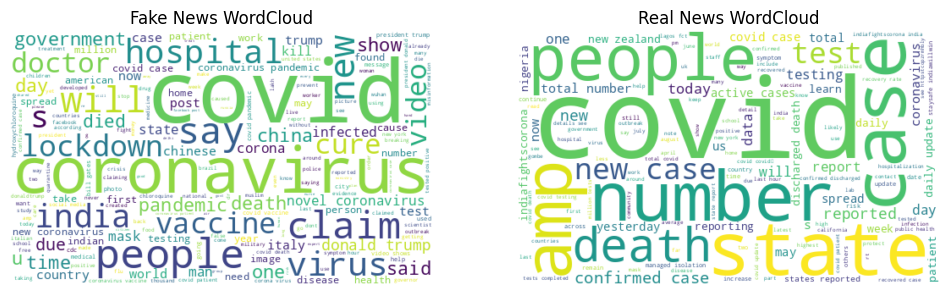

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_text = " ".join(train_df[train_df["label"] == "fake"]["tweet"])
real_text = " ".join(train_df[train_df["label"] == "real"]["tweet"])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(WordCloud(width=500, height=300, background_color="white").generate(fake_text), interpolation="bilinear")
ax[0].set_title("Fake News WordCloud")
ax[0].axis("off")

ax[1].imshow(WordCloud(width=500, height=300, background_color="white").generate(real_text), interpolation="bilinear")
ax[1].set_title("Real News WordCloud")
ax[1].axis("off")

plt.show()


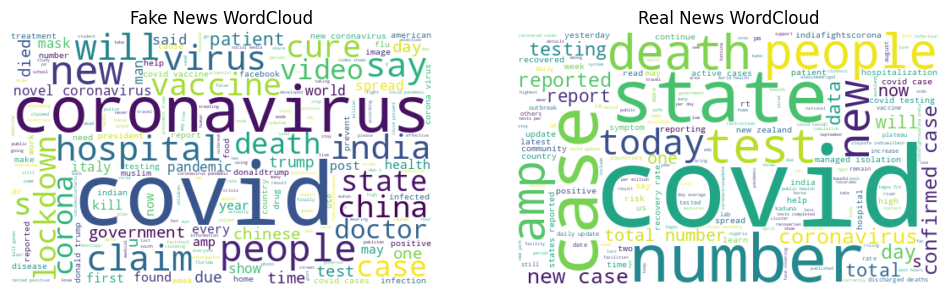

In [ ]:
fake_text = " ".join(val_df[val_df["label"] == "fake"]["tweet"])
real_text = " ".join(val_df[val_df["label"] == "real"]["tweet"])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(WordCloud(width=500, height=300, background_color="white").generate(fake_text), interpolation="bilinear")
ax[0].set_title("Fake News WordCloud")
ax[0].axis("off")

ax[1].imshow(WordCloud(width=500, height=300, background_color="white").generate(real_text), interpolation="bilinear")
ax[1].set_title("Real News WordCloud")
ax[1].axis("off")

plt.show()


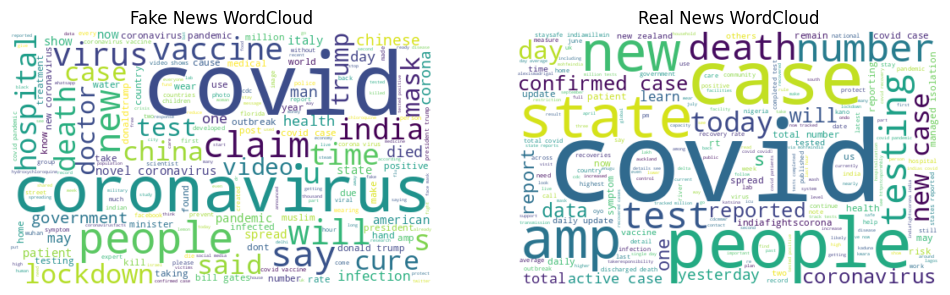

In [ ]:
fake_text = " ".join(test_df[test_df["label"] == "fake"]["tweet"])
real_text = " ".join(test_df[test_df["label"] == "real"]["tweet"])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(WordCloud(width=500, height=300, background_color="white").generate(fake_text), interpolation="bilinear")
ax[0].set_title("Fake News WordCloud")
ax[0].axis("off")

ax[1].imshow(WordCloud(width=500, height=300, background_color="white").generate(real_text), interpolation="bilinear")
ax[1].set_title("Real News WordCloud")
ax[1].axis("off")

plt.show()


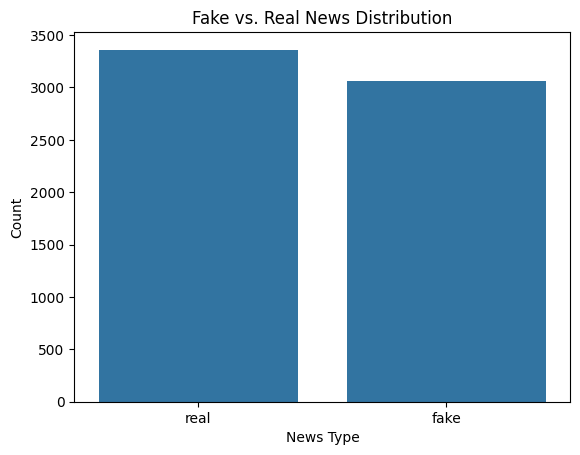

In [ ]:
import seaborn as sns

sns.countplot(x=train_df["label"])
plt.title("Fake vs. Real News Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()


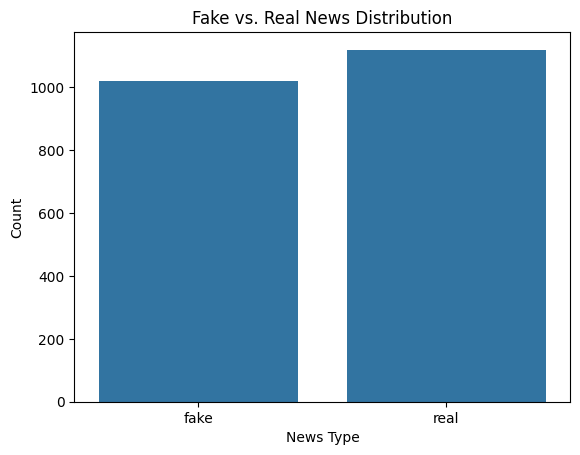

In [ ]:
sns.countplot(x=val_df["label"])
plt.title("Fake vs. Real News Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

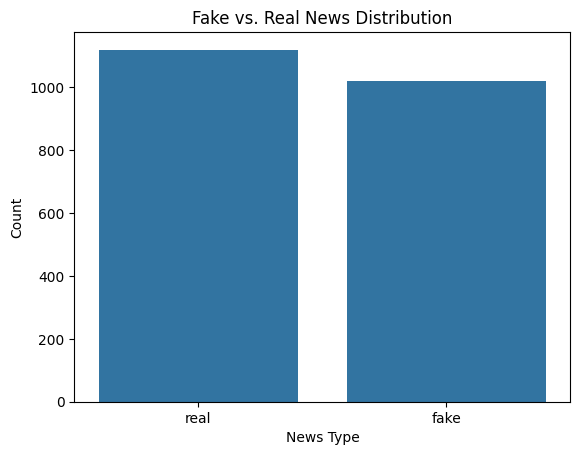

In [ ]:
sns.countplot(x=test_df["label"])
plt.title("Fake vs. Real News Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

def preprocess_text(tweet):

    tweet = tweet.lower()


    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)


    tokens = word_tokenize(tweet)


    tokens = [word for word in tokens if word not in stopwords.words("english")]


    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

train_df["tweet"] = train_df["tweet"].apply(preprocess_text)
val_df["tweet"] = val_df["tweett"].apply(preprocess_text)
test_df["tweet"] = test_df["tweet"].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
from nltk.tokenize import word_tokenize

text = "This is a test sentence."
tokens = word_tokenize(text)

print(tokens)  # It should print: ['This', 'is', 'a', 'test', 'sentence', '.']


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
